# Task #01

The goal of this task is to use some data set, analyze it, visualize it and generate and useful report out of it. This task requires the usage of python to better analyse the data and visualize it.

## Data Set
In this notebook we are going to be working on spotify data and see which type so songs have more influence and which artists create such songs. We'll also do some more statistical analysis on the data and get better understandings on how to manipulate the data using panda.

In [5]:
# importing panda library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Import the data

Our data is available in Coma Separated Values (CSV) format therefore we'll use the `read_csv` function available in pandas library to import the data into our python script.

To import without any errors we need to specify the encoding as `latin-1`

In [6]:
# importing the data
data = pd.read_csv("./spotify.csv", sep=",", encoding="latin-1")

## Data Cleanup

- First step is to drop some columns which are not relevant to our approach.
- Secondly remove any rows that have any cell as empty as removal of 5-10 rows will not have any huge impact on our analysis

In [7]:
# removing unecessary columns
data = data.drop(['bpm', 'key', 'mode'], axis = 1)

# cleaning up the data by removing empty rows
#
# after cleanup, we get 903 rows from 954 rows which is fine for us.
# to avoid this loss, we can replace the data with mean/mode/median as well.
data = data.dropna()

## Analyze based on several factors

Now let's see which songs hit the most audience based on the given several factors:

- Danceibility
- Valence
- Energy
- Acousticness
- Instrumentalness
- Liveness
- Speechiness

In [16]:
# Lets first get the streams column and all the columns with the factors so we can analyse and process on it comfortably.
factors = data[["danceability_%","valence_%","energy_%","acousticness_%","instrumentalness_%","liveness_%","speechiness_%", "streams"]]

# now to start things off, let's first only work on Danceability and see the data trend
dance = factors[["danceability_%", "streams"]]

# our streams data is extremely huge and it is in object values so we are going to convert it into 'int64' bit type
dance.loc[:, 'streams'] = dance['streams'].replace({'[^0-9]': ''}, regex=True)

# Convert the 'streams' column to int64
dance.loc[:, 'streams'] = pd.to_numeric(dance['streams'], errors='coerce')

# Drop rows with NaN values in the 'streams' column (if any)
dance = dance.dropna(subset=['streams'])

Since we already have cleared out many parts of our data and ready to analyse. Let's address another issue so we can officially run our tests.

Now let's catgerize our data such that the scattered values can get a little more organization for more clearance in data visualization.

In [17]:
max_dance = dance['danceability_%'].max()
min_dance = dance['danceability_%'].min()

divisions = np.linspace(min_dance, max_dance, num=10)
labels = [10, 20, 30, 40, 50, 60, 70, 80, 90]

dance["dance_cat"] = pd.cut(dance['danceability_%'], bins=divisions, labels=labels, include_lowest=True)

result = dance.groupby("dance_cat").mean().astype('int64')

C:\Users\ibrah\AppData\Local\Temp\ipykernel_10236\1629872998.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = dance.groupby("dance_cat").mean().astype('int64')


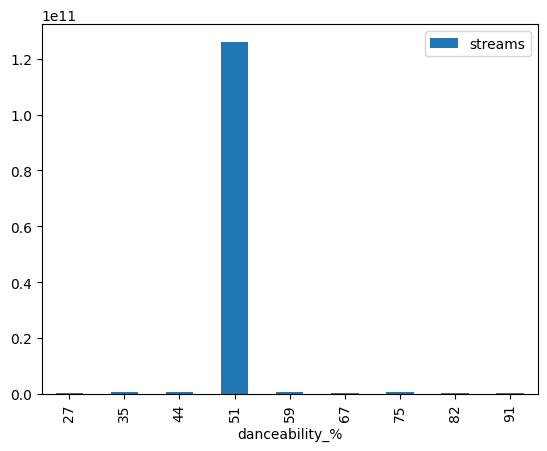

In [18]:
# and now finally visualizing the data using `matplotlib` library
result.plot(x='danceability_%', y='streams', kind='bar')
plt.show()

## Initial Results

From our first calculations we can very clearly see that keeping that danceability portion of our data to around `51` gets it the most liking from the audience meaning very low and very high portion of this data will result in low streams across all platforms.

We can even verify our results by seeing that the top 3 songs with most streams have danceability of 50, 81, 50.

## Analyzing all the factors

Now let's try to collectively analyse rest of the factors and see their impact on the songs.

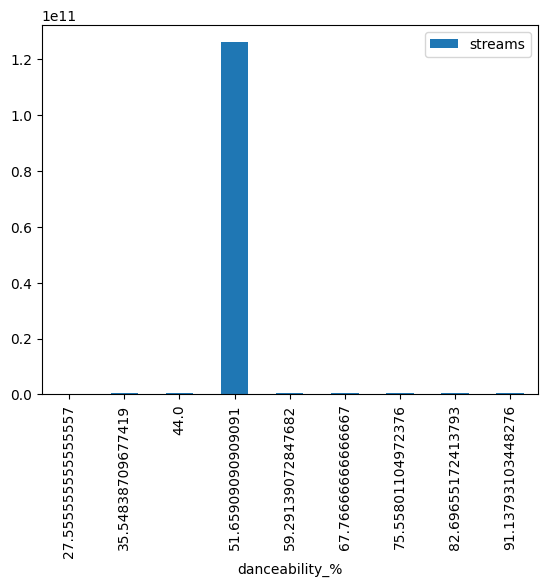

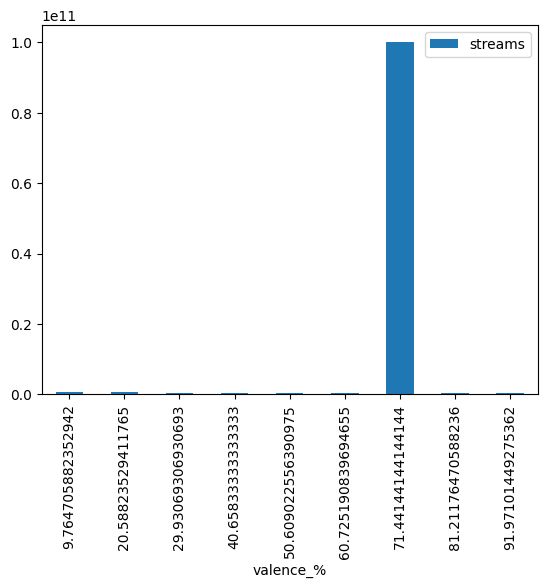

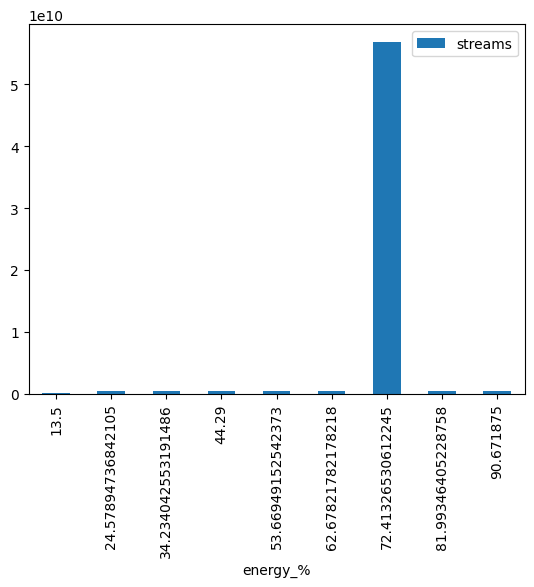

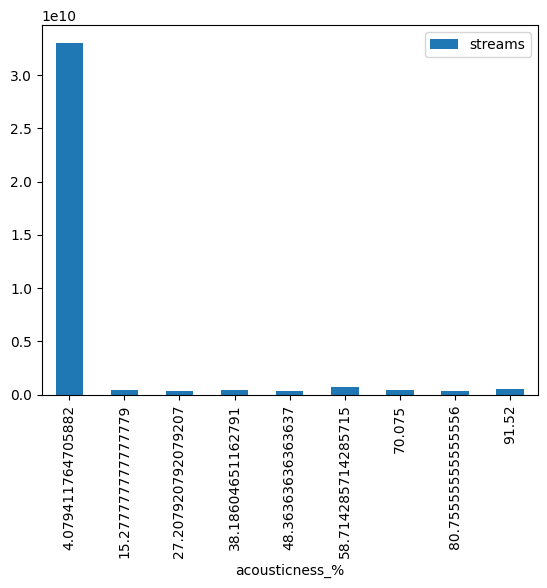

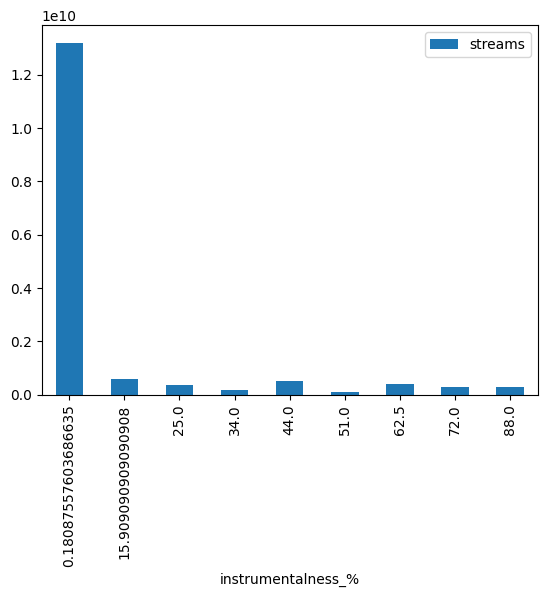

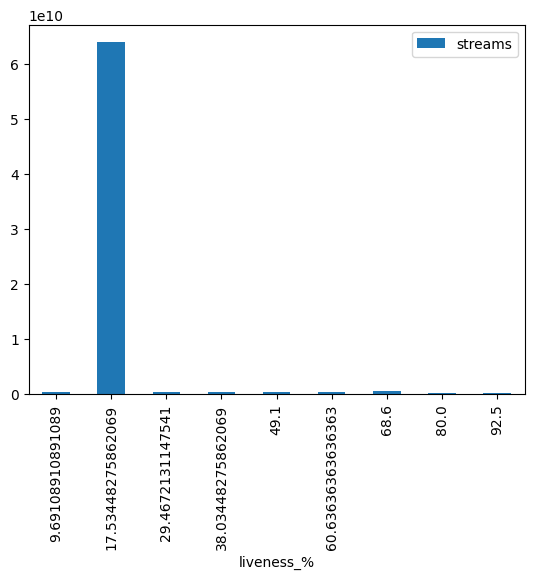

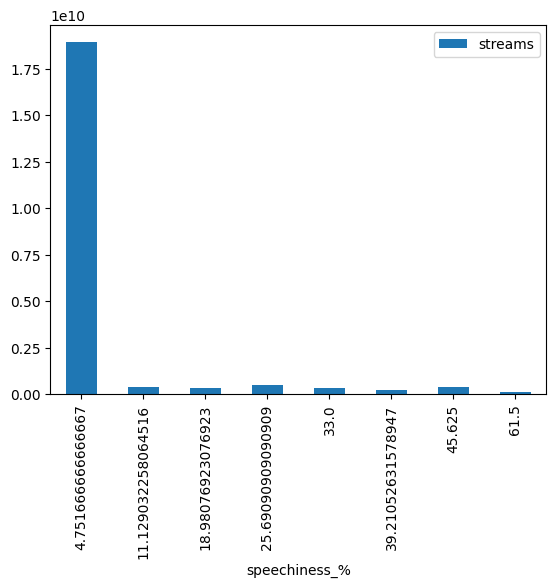

In [21]:
factors = data[["danceability_%","valence_%","energy_%","acousticness_%","instrumentalness_%","liveness_%","speechiness_%", "streams"]]

# Clean up the 'streams' column by keeping only numeric characters
factors.loc[:, 'streams'] = factors['streams'].replace({'[^0-9]': ''}, regex=True)

# Convert the 'streams' column to int64
factors.loc[:, 'streams'] = pd.to_numeric(factors['streams'], errors='coerce')

# Drop rows with NaN values in the 'streams' column (if any)
factors = factors.dropna(subset=['streams'])

# creating collection of all the different datasets onto which
# we will perform our analysis and visualizations
collection : pd.DataFrame = []
for col in factors.columns:
    collection.append(pd.DataFrame({col: factors[col], 'streams': factors['streams']}))

# removing the repeation
collection.pop()

max = []
min = []

for i in collection:
    max.append(i.iloc[:, 0].max())
    min.append(i.iloc[:, 0].min())
    
divisions = []
for i in range(0, 7):
    divisions.append(np.linspace(min[i], max[i], num=10))

labels = [10, 20, 30, 40, 50, 60, 70, 80, 90]

count = 0
result = []
for i in collection:
    i["category"] = pd.cut(i.iloc[:, 0], bins=divisions[count], labels=labels, include_lowest=True)
    count = count + 1
    result.append(i.groupby("category", observed = True).mean())

for i in result:
    i.plot(x=i.columns[0], y='streams', kind='bar')
    
plt.show()


## Findings

By running the above script we can see that in most of our factors, there is only 1 range that is highly attractive and magnets the most streams. We can list them as:

- Danceability: Range (45-60)
- Valence: Range (60-75)
- Energy: Range (58-72)
- Acousticness: Range (1-12)
- Instrumentalness: Range (1-12)
- Liveness: Range (10-20)
- Speechness: Range (1-11)